In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv("housing.csv")

In [66]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [68]:
data.dropna(inplace=True)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [70]:
from sklearn.model_selection import train_test_split

In [72]:
X=data.drop(['median_house_value'], axis=1)
Y=data['median_house_value']
Y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [14]:
train_data=x_train.join(y_train)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8693,-118.33,33.86,36,854,160.0,473,150,6.3992,<1H OCEAN,259600
6304,-117.92,34.00,36,116,30.0,193,35,3.8125,<1H OCEAN,136300
1403,-122.08,37.95,33,1043,157.0,425,148,4.8702,NEAR BAY,235600
5759,-118.29,34.17,17,3852,1066.0,2986,993,2.3482,<1H OCEAN,255400
3175,-119.83,36.37,25,1549,269.0,819,272,2.7159,INLAND,101400
...,...,...,...,...,...,...,...,...,...,...
7399,-118.24,33.96,39,643,186.0,821,191,2.5729,<1H OCEAN,97300
17849,-121.87,37.42,25,4430,729.0,2685,721,5.6965,<1H OCEAN,261100
14373,-117.24,32.72,39,3819,594.0,1361,583,6.6013,NEAR OCEAN,396400
10081,-120.23,39.36,7,2045,358.0,245,92,4.0481,INLAND,152300


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002606E934E20>,
      dtype=object)

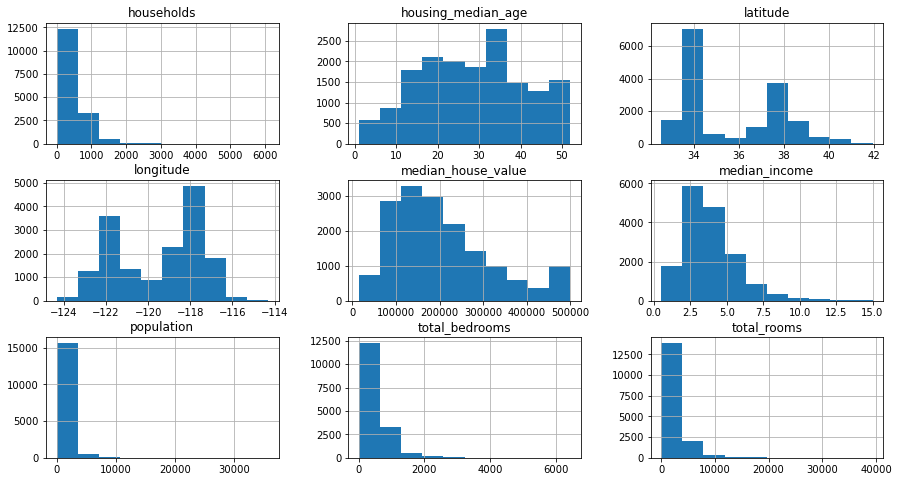

In [16]:
train_data.hist(figsize=(15,8))

In [17]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
8693,-118.33,33.86,36,854,160.0,473,150,6.3992,259600,1,0,0,0,0
6304,-117.92,34.00,36,116,30.0,193,35,3.8125,136300,1,0,0,0,0
1403,-122.08,37.95,33,1043,157.0,425,148,4.8702,235600,0,0,0,1,0
5759,-118.29,34.17,17,3852,1066.0,2986,993,2.3482,255400,1,0,0,0,0
3175,-119.83,36.37,25,1549,269.0,819,272,2.7159,101400,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7399,-118.24,33.96,39,643,186.0,821,191,2.5729,97300,1,0,0,0,0
17849,-121.87,37.42,25,4430,729.0,2685,721,5.6965,261100,1,0,0,0,0
14373,-117.24,32.72,39,3819,594.0,1361,583,6.6013,396400,0,0,0,0,1
10081,-120.23,39.36,7,2045,358.0,245,92,4.0481,152300,0,1,0,0,0


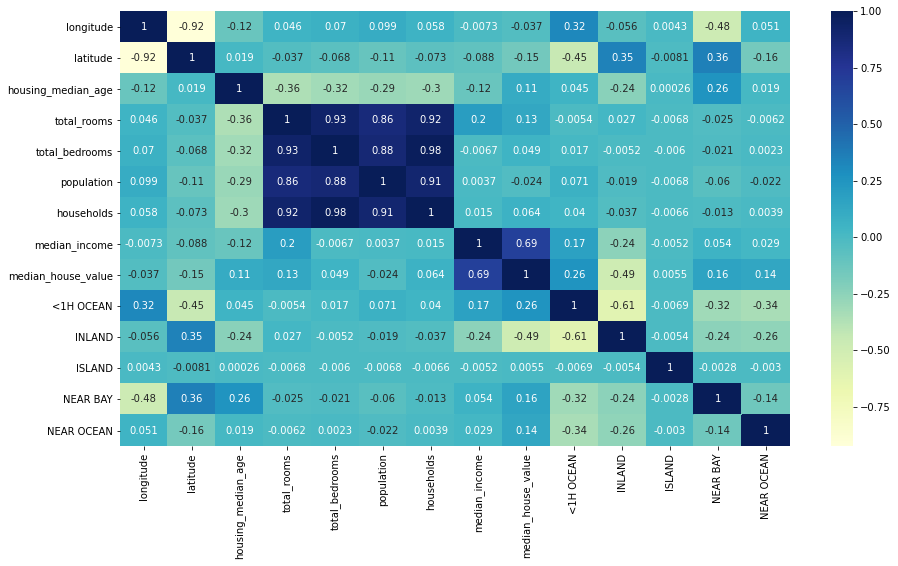

In [20]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

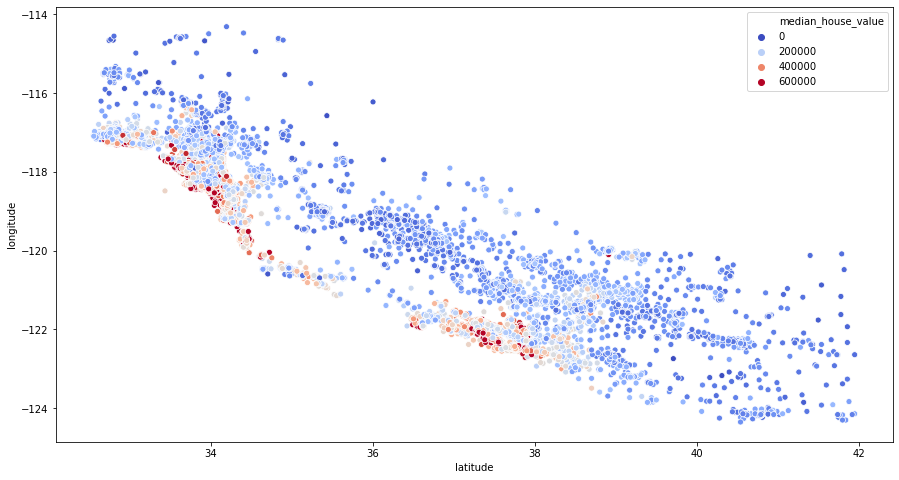

In [21]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")

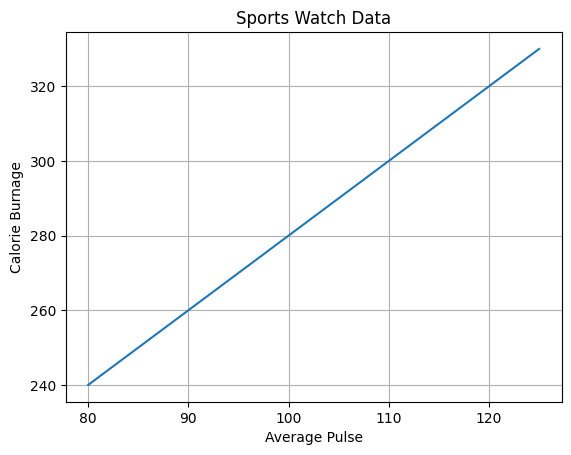

In [40]:
# This is another test for python coding practices
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.title("Sports Watch Data")
plt.xlabel("Average Pulse")
plt.ylabel("Calorie Burnage")

plt.plot(x, y)

plt.grid()

plt.show()